# Energy Consumption Forecast

- In this notebook, we will make **one-step** and **multi-step** forecast of electric consumption.  
- The dataset consists of **three years of hourly electricity load and temperature** records.  
- To make these predictions, we will use several kinds of **statistical**, **machine learning** and **deep learning** models. Then, we will compare their performances and select the best one. 

## Explaratory Data Analysis
First, we will describe and visualize the dataset.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('energy_demand.xlsx', sheet_name='energy_demand')
df

,Date,Hour,load,T
0,2012-01-01,0,2872.0,30.666667
1,2012-01-01,1,2698.0,32.000000
2,2012-01-01,2,2558.0,32.666667
3,2012-01-01,3,2444.0,30.000000
4,2012-01-01,4,2402.0,31.000000
...,...,...,...,...
26300,2014-12-31,20,4012.0,18.000000
26301,2014-12-31,21,3856.0,16.666667
26302,2014-12-31,22,3671.0,17.000000
26303,2014-12-31,23,3499.0,15.333333


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26305 entries, 0 to 26304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    26305 non-null  datetime64[ns]
 1   Hour    26305 non-null  int64         
 2   load    26305 non-null  float64       
 3   T       26305 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 822.2 KB


There are no missing values.  
We can rename the 'load' column to 'Load', so that the naming convention is the same of all columns and that we won't have to specify a custom label 'Load' in our graphs (for them to look good).

In [3]:
df.rename(columns={'load': 'Load'}, inplace=True)

We will set a partial index of Date + Hour and then visualize the data in a lineplot chronologically.

In [4]:
df = df.set_index(['Date', 'Hour'])
df.index

MultiIndex([('2012-01-01',  0),
            ('2012-01-01',  1),
            ('2012-01-01',  2),
            ('2012-01-01',  3),
            ('2012-01-01',  4),
            ('2012-01-01',  5),
            ('2012-01-01',  6),
            ('2012-01-01',  7),
            ('2012-01-01',  8),
            ('2012-01-01',  9),
            ...
            ('2014-12-31', 15),
            ('2014-12-31', 16),
            ('2014-12-31', 17),
            ('2014-12-31', 18),
            ('2014-12-31', 19),
            ('2014-12-31', 20),
            ('2014-12-31', 21),
            ('2014-12-31', 22),
            ('2014-12-31', 23),
            ('2014-12-31', 24)],
           names=['Date', 'Hour'], length=26305)

In [5]:
df[10:40]

Load          T
Date       Hour                   
2012-01-01 10    3105.0  33.333333
           11    3174.0  36.666667
           12    3180.0  40.333333
           13    3184.0  43.666667
           14    3147.0  43.333333
           15    3122.0  45.000000
           16    3137.0  44.666667
           17    3486.0  43.333333
           18    3717.0  41.666667
           19    3659.0  41.333333
           20    3513.0  41.666667
           21    3344.0  42.666667
           22    3129.0  43.333333
           23    2873.0  44.333333
           24    2639.0  44.000000
2012-01-02 1     2458.0  43.666667
           2     2354.0  43.000000
           3     2294.0  42.666667
           4     2288.0  43.666667
           5     2353.0  43.000000
           6     2503.0  41.000000
           7     2737.0  40.000000
           8     2960.0  37.333333
           9     3185.0  37.000000
           10    3390.0  37.333333
           11    3510.0  38.666667
           12    3549.0  40.000000
           13    3517.0  38.000000
           14    3469.0  39.333333
           15    3449.0  38.333333

In [6]:
df.loc[('2013-02-08', 7)]  # to showcase how to access a specific row using multi-index

Load    3701.000000
T         12.666667
Name: (2013-02-08 00:00:00, 7), dtype: float64

For visualization purposes, we can define new columns **Year, Month, Day**.

In [7]:
df['Year'] = df.index.get_level_values(0).year
df['Month'] = df.index.get_level_values(0).month
df['Day'] = df.index.get_level_values(0).day

Let's see how the **Energy Demand varies each hour**. We will also differentiate the lineplots by year, resulting in 3 lineplots, which we can compare and conclude if the Energy Demand varies year by year.

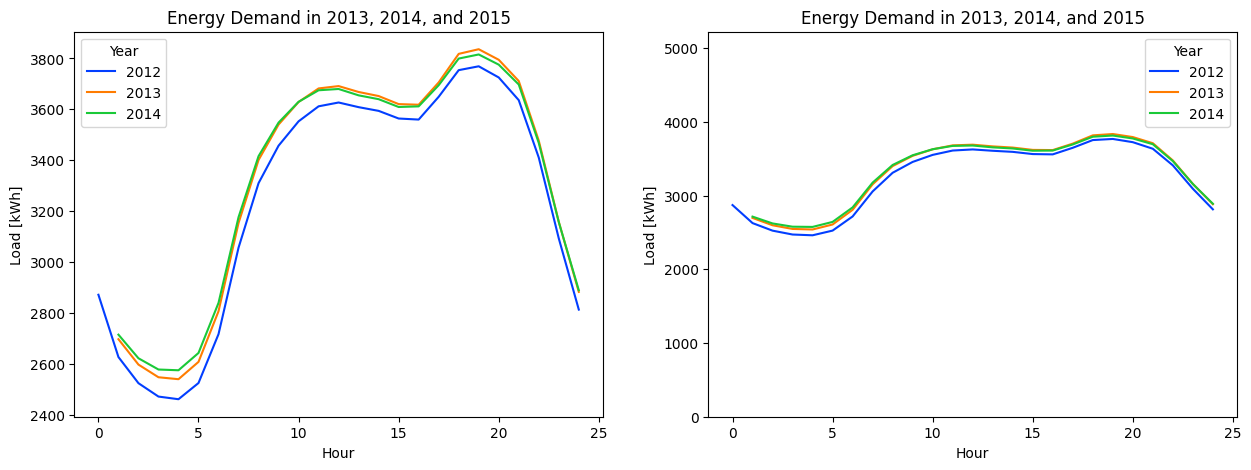

In [8]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(data=df, x='Hour', y='Load', hue='Year', errorbar=None, palette='bright', legend='full', ax=axes[0])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]');

sns.lineplot(data=df, x='Hour', y='Load', hue='Year', errorbar=None, palette='bright', legend='full', ax=axes[1])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]', ylim=(0, df['Load'].max()));

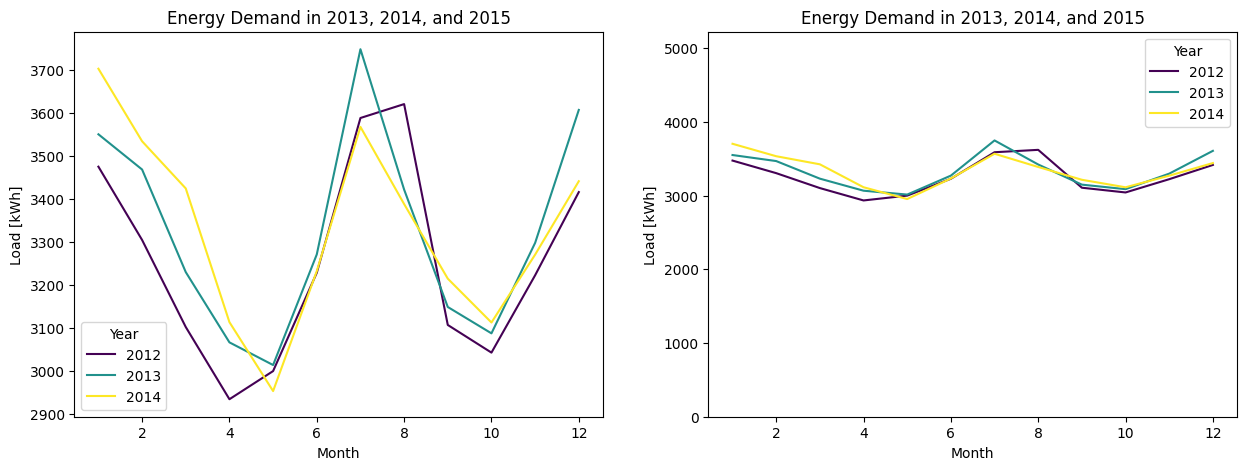

In [9]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=df, x='Month', y='Load', hue='Year',errorbar=None, palette='viridis', ax=axes[0])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]');
sns.lineplot(data=df, x='Month', y='Load', hue='Year',errorbar=None, palette='viridis', ax=axes[1])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]', ylim=(0, df['Load'].max()));

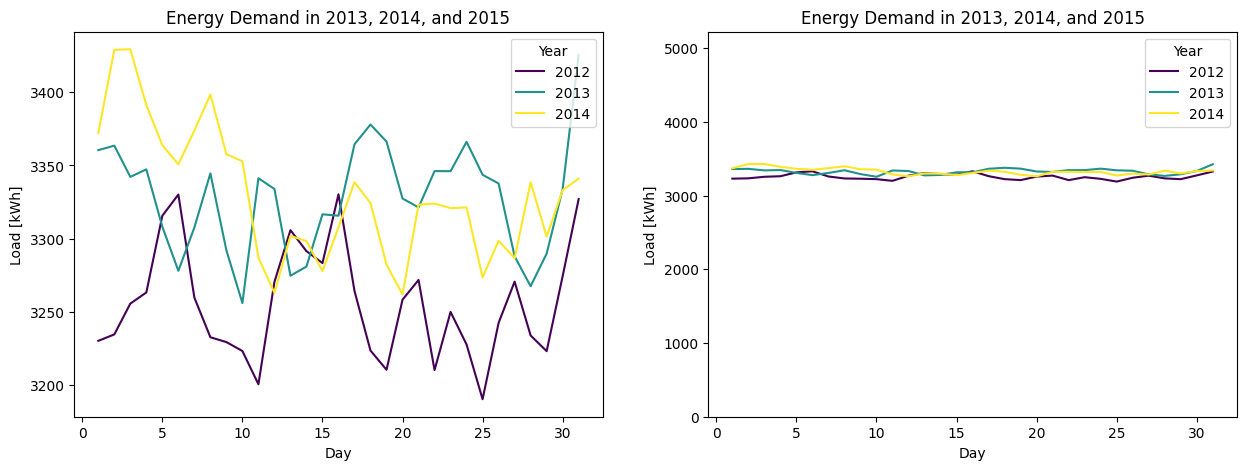

In [14]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=df, x='Day', y='Load', hue='Year', errorbar=None, palette='viridis', ax=axes[0])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]');
sns.lineplot(data=df, x='Day', y='Load', hue='Year', errorbar=None, palette='viridis', ax=axes[1])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]', ylim=(0, df['Load'].max()));

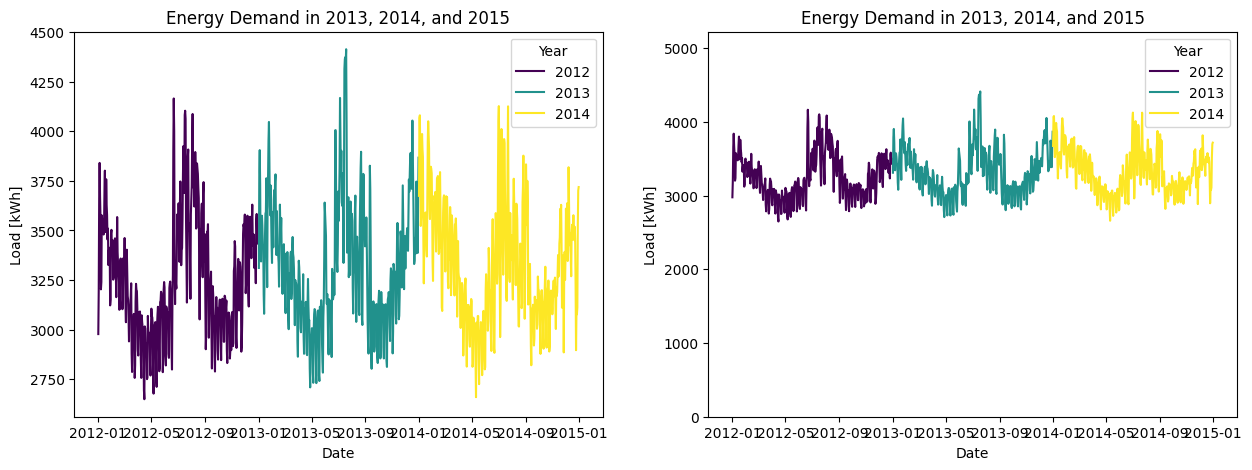

In [12]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='Load', hue='Year', errorbar=None, palette='viridis', ax=axes[0])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]');
sns.lineplot(data=df, x='Date', y='Load', hue='Year', errorbar=None, palette='viridis', ax=axes[1])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]', ylim=(0, df['Load'].max()));

### Summary
- **Scale is very important!** In the left sides, it would seem that the differences between hours/months/dates are bigger then they actually are, but that is because **the scale is misleading**. If we set the scale to start at 0 and end above the maximum value, then we get a much more trustworthy result.
- By hour, the energy demand is the **lowest around 4AM** and **highest around 7PM**, which makes a lot of sense; at 4AM, everybody should be sleeping and not consuming energy and at 7PM, most of the household is at home, cooking dinner or using the appliances.
- By month, **highest consumption is winter and summer months**, while during **spring and autumn it's lower**. I would argue this is because during winter months, the household uses heating a lot, while during summer months, they would use the AC.
- During the days of the month, the energy demand stays at the same level.
- The energy demand is **virtually the same in all three years**.